In [2]:
import math

import open3d as o3d
import os
import numpy as np
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [8]:
def draw_centers(centers, radius, color):
    spheres = []
    sphere_radius = radius 
    
    for point in centers:
        mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=sphere_radius)
        mesh_sphere.compute_vertex_normals()
        
        mesh_sphere.translate(point)
        
        spheres.append(mesh_sphere)
    
    all_spheres = o3d.geometry.TriangleMesh()
    for sphere in spheres:
        all_spheres += sphere
    
    all_spheres.paint_uniform_color(color) 
    
    o3d.visualization.draw_geometries([all_spheres])

In [17]:
def draw_multiple_centers(center_sets, radius, colors):
    all_geometries = []
    
    for centers, radius, color in zip(center_sets, radius, colors):
        spheres = []
        for point in centers:
            mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=radius)
            mesh_sphere.compute_vertex_normals()
            mesh_sphere.translate(point)
            mesh_sphere.paint_uniform_color(color)
            spheres.append(mesh_sphere)
        
        # Combine all spheres for this set into one mesh (optional, for efficiency)
        combined_mesh = o3d.geometry.TriangleMesh()
        for sphere in spheres:
            combined_mesh += sphere
        
        all_geometries.append(combined_mesh)
    
    # Visualize all geometries together
    o3d.visualization.draw_geometries(all_geometries)

[[-0.29865748 -2.105876    0.49913087]
 [-0.6120205   3.0288448  -0.6479144 ]
 [-0.6151941   0.72148037  2.539434  ]
 ...
 [-0.6787995   1.8361926   1.8351843 ]
 [-0.1298303  -4.2343793   2.5733304 ]
 [-0.6442602   1.372258   -0.8640118 ]] 6000


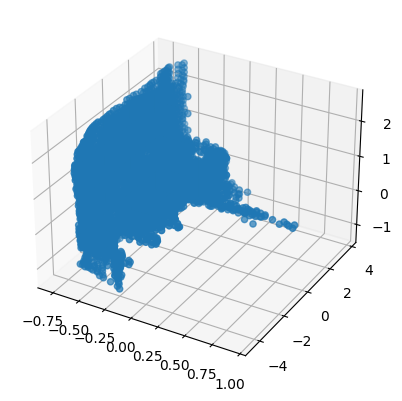

In [4]:
center_datas = []
for i in range(2, 7):
    center_filename = fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene-max-6000/mesh_0res_6000_{i:03d}.xyz'
    center_data = np.loadtxt(center_filename)
    center_datas.append(center_data)

center0 = center_datas[0]
print(center0, center0.__len__())

In [177]:
import numpy as np

movement_threshold = 0.015

center_datas = []
for i in range(2, 8):
    center_filename = fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene-max-6000/mesh_0res_6000_{i:03d}.xyz'
    center_data = np.loadtxt(center_filename)
    center_datas.append(center_data)


num_frames = len(center_datas)
num_centers = len(center_datas[0]) 


low_movement_centers = []
high_movement_centers = []


for center_idx in range(num_centers):
    total_movement = 0

    for frame_idx in range(num_frames - 1):
        displacement = np.linalg.norm(center_datas[frame_idx + 1][center_idx] - center_datas[frame_idx][center_idx])
        total_movement += displacement


    if total_movement < movement_threshold:
        low_movement_centers.append(center_idx)
    else:
        high_movement_centers.append(center_idx)

print("Centers with low movement:", low_movement_centers, len(low_movement_centers))
print("Centers with high movement:", high_movement_centers, len(high_movement_centers))


Centers with low movement: [0, 3, 6, 8, 11, 13, 18, 23, 28, 31, 34, 36, 40, 43, 44, 45, 47, 48, 53, 55, 57, 59, 62, 67, 69, 71, 72, 73, 74, 75, 86, 90, 92, 93, 94, 96, 98, 100, 102, 103, 104, 107, 108, 110, 113, 114, 115, 117, 119, 120, 122, 124, 125, 127, 128, 134, 135, 138, 142, 143, 146, 148, 154, 156, 158, 159, 160, 178, 181, 186, 188, 191, 195, 197, 200, 202, 206, 215, 217, 219, 223, 225, 229, 230, 232, 234, 238, 239, 240, 241, 243, 245, 246, 248, 249, 250, 251, 255, 256, 257, 258, 261, 262, 265, 266, 268, 270, 271, 274, 285, 286, 293, 294, 299, 300, 301, 309, 314, 315, 318, 323, 333, 336, 340, 342, 349, 352, 355, 359, 360, 362, 366, 370, 375, 376, 382, 387, 394, 398, 399, 402, 403, 412, 423, 430, 433, 434, 438, 441, 445, 451, 452, 453, 457, 458, 459, 460, 462, 465, 469, 471, 476, 477, 480, 482, 486, 487, 491, 493, 494, 496, 497, 499, 501, 502, 505, 507, 509, 519, 522, 524, 534, 535, 537, 540, 546, 548, 549, 551, 553, 554, 559, 560, 561, 562, 564, 568, 569, 571, 575, 578, 579, 581

In [178]:
static_centers = []
dynamic_centers = []
for i in low_movement_centers:
    static_centers.append(center_datas[0][i])
for i in high_movement_centers:
    dynamic_centers.append(center_datas[0][i])

In [28]:
draw_centers(dynamic_centers, radius=0.03, color=[0.4, 0.4, 0.4])

In [179]:
radii = [0.03, 0.03]
colors = [(0.4, 0.4, 0.4), (1, 0, 0)]

draw_multiple_centers([static_centers, dynamic_centers], radii, colors)

In [4]:
import numpy as np
i = 1
#center_filename = fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene-max-20000/mesh_0res_20000_00{i:1}.xyz'
#center_data = np.loadtxt(center_filename)
mesh = o3d.io.read_triangle_mesh(fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene/mesh_000{i:1}.obj')
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

In [181]:
for i in range(2, 3):
    centers_i = o3d.geometry.PointCloud()
    centers_i.points = o3d.utility.Vector3dVector(center_datas[i-2])
    centers_i_tree = o3d.geometry.KDTreeFlann(centers_i)
    
    mesh = o3d.io.read_triangle_mesh(fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene/mesh_000{i:1}.obj')
    mesh.compute_vertex_normals()
    vertices = np.array(mesh.vertices)
    triangles = np.array(mesh.triangles)
    
    static_indices = []
    dynamic_indices = []
    
    for i in range(len(vertices)):
        [k, index, _] = centers_i_tree.search_knn_vector_3d(vertices[i], 1)
        
        if index[0] in low_movement_centers:  
            static_indices.append(i)
        else:
            dynamic_indices.append(i)
    
    static_parts = mesh.select_by_index(static_indices)
    dynamic_parts = mesh.select_by_index(dynamic_indices)
    
    static_parts.paint_uniform_color([0.4, 0.4, 0.4])  
    dynamic_parts.paint_uniform_color([1, 0, 0]) 
    
    o3d.visualization.draw_geometries([static_parts, dynamic_parts])

In [56]:
alpha = 0.1
def compute_affinity(i, j, frame_range, center_datas):
    max_distance = 0
    for frame_idx in frame_range:
        distance = np.linalg.norm(center_datas[frame_idx][i] - center_datas[frame_idx][j])
        if(distance > max_distance):
            max_distance = distance
    return math.exp(-pow(alpha * max_distance, 2))

In [194]:
dynamic_deformed = o3d.io.read_triangle_mesh(r"G:\VS2022Projects\tvm-editing\TVMEditor.Test\bin\Release\net5.0\output\drinking\reference/deformed_reference_mesh_006.obj")
dynamic_deformed.compute_vertex_normals()
dynamic_deformed.paint_uniform_color([1, 0, 0])

TriangleMesh with 65085 points and 128264 triangles.

In [141]:
dynamic_deformed_meshes = []
for i in range(2, 8):
    dynamic_deformed = o3d.io.read_triangle_mesh(fr"G:\VS2022Projects\tvm-editing\TVMEditor.Test\bin\Release\net5.0\output\drinking\reference/deformed_reference_mesh_{i:03}.obj")
    dynamic_deformed.compute_vertex_normals()
    dynamic_deformed.paint_uniform_color([1, 0, 0])
    dynamic_deformed_meshes.append(dynamic_deformed)

In [146]:
o3d.visualization.draw_geometries([dynamic_deformed_meshes[0], dynamic_deformed_meshes[1]])

In [195]:
o3d.visualization.draw_geometries([dynamic_deformed, static_parts])

In [ ]:
new_mesh = o3d.geometry.TriangleMesh()
new_mesh += static_parts
new_mesh += dynamic_parts

new_mesh.fill_holes

In [182]:
import open3d as o3d
import numpy as np
def get_selected_parts(mesh, dynamic_indices, static_indices):
    selected_vertex_indices = dynamic_indices 
    
    vertices = np.asarray(mesh.vertices)
    triangles = np.asarray(mesh.triangles)
    selected_indices_set = set(selected_vertex_indices)
    
    new_vertex_indices = {}
    new_index_counter = 0
    
    new_vertices = []
    new_triangles = []
    
    for tri in triangles:
        in_selected = [v in selected_indices_set for v in tri]
        if sum(in_selected) >= 1: 
            new_triangle = []
            for v in tri:
                if v not in new_vertex_indices:
                    new_vertex_indices[v] = new_index_counter
                    new_vertices.append(vertices[v])
                    new_index_counter += 1
                new_triangle.append(new_vertex_indices[v])
            new_triangles.append(new_triangle)
    
    dynamic_mesh = o3d.geometry.TriangleMesh(
        vertices=o3d.utility.Vector3dVector(new_vertices),
        triangles=o3d.utility.Vector3iVector(new_triangles)
    )
    
    dynamic_mesh.compute_vertex_normals()
    
    dynamic_mesh.paint_uniform_color([1, 0, 0])
    
    static_mesh = mesh.select_by_index(static_indices)
    return dynamic_mesh, static_mesh

dynamic_mesh, static_mesh = get_selected_parts(mesh, dynamic_indices, static_indices)
o3d.visualization.draw_geometries([dynamic_mesh, static_mesh])



In [173]:
o3d.visualization.draw_geometries([dynamic_mesh])

In [176]:
dynamic_mesh.remove_degenerate_triangles()
o3d.visualization.draw_geometries([dynamic_mesh])
o3d.io.write_triangle_mesh(fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene\Dynamic/dynamic_parts_test.obj', dynamic_mesh, write_vertex_normals=False, write_vertex_colors=False, write_triangle_uvs=False)

[Open3D WARNING] Write OBJ can not include triangle normals.


True

In [116]:
print(len(np.array(dynamic_mesh.triangles)))
print(len(np.array(dynamic_parts.triangles)))

72533
63593


In [183]:
o3d.io.write_triangle_mesh(fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene\Dynamic/dynamic_parts_coarse.obj', dynamic_mesh, write_vertex_normals=False, write_vertex_colors=False, write_triangle_uvs=False)
o3d.io.write_triangle_mesh(fr'G:\VS2022Projects\arap-volume-tracking-main\data\scene\Static/static_parts_coarse.obj', static_mesh, write_vertex_normals=False, write_vertex_colors=False, write_triangle_uvs=False)

[Open3D WARNING] Write OBJ can not include triangle normals.
[Open3D WARNING] Write OBJ can not include triangle normals.


True